In [1]:
#项目4-项目实施代码1

import pandas as pd

#读取数据并进行输出
names=['label','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13']
dataset=pd.read_csv("wine.data",names=names)
print("葡萄酒数据集如下：")
print(dataset)
#分别提取数据集的特征变量与标签
data=dataset.iloc[range(0,178),range(1,14)] #特征变量
#print(data)
target=dataset.iloc[range(0,178),range(0,1)]#标签

葡萄酒数据集如下：
     label     a1    a2    a3    a4   a5    a6    a7    a8    a9    a10   a11  \
0        1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1        1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2        1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3        1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4        1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173      3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174      3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175      3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176      3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177      3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

      a12   a13  

<class 'list'>
<class 'matplotlib.lines.Line2D'>
<class 'numpy.ndarray'>
[5.8 5.51 5.65]
[5.8 5.51 5.65]
a 1 中异常值： []
a 2 中异常值： [5.8 5.51 5.65]
a 3 中异常值： [1.36 3.22 3.23]
a 4 中异常值： [10.6 30.0 28.5 28.5]
a 5 中异常值： [151.0 139.0 136.0 162.0]
a 6 中异常值： []
a 7 中异常值： []
a 8 中异常值： []
a 9 中异常值： [3.28 3.58]
a 10 中异常值： [10.8 13.0 11.75 10.68]
a 11 中异常值： [1.71]
a 12 中异常值： []
a 13 中异常值： []


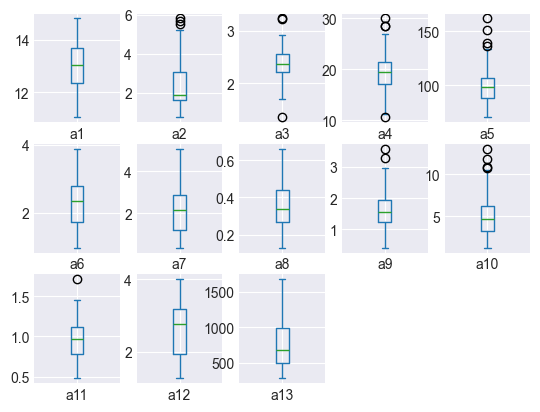

In [2]:
import matplotlib.pyplot as plt
#画箱形图
plt.style.available
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['axes.unicode_minus']=False 	#正常显示负号

data.plot(kind='box',subplots=True,layout=(3,5),sharex=False,sharey=False)
#查找异常数据并进行输出


p=data.boxplot(return_type='dict')	#返回字典类型数据
# plt.boxplot(data)
print(type(p['fliers']))
print(type(p['fliers'][1]))
print(type(p['fliers'][1].get_ydata()))

print(p['fliers'][1].get_ydata())
print(p['fliers'][1].get_ydata())

for i in range(13):
    y=p['fliers'][i].get_ydata()
    #查找异常数据
    print('a',i+1,'中异常值：',y)		#输出异常数据
plt.title('垂直摆放',size=20)
plt.show()

In [3]:
import matplotlib.pyplot as plt
#画箱形图
plt.style.use('seaborn-v0_8')


In [ ]:
#项目4-项目实施代码2

import pandas as pd
from sklearn import preprocessing

#导入数据，分别提取数据集的特征变量与标签
names=['label','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13']
dataset=pd.read_csv("wine-clean.data",names=names)
# print(dataset)
data=dataset.iloc[range(0,178),range(1,14)] #特征变量
# print(type(dataset.iloc[range(0,178),range(0,1)]),dataset.iloc[range(0,178),range(0,1)])
# print(type(dataset.iloc[range(0,178),range(0,1)].values),dataset.iloc[range(0,178),range(0,1)].values)
# print(type(dataset.iloc[range(0,178),range(0,1)].values),dataset.iloc[range(0,178),range(0,1)].values.reshape(1,178))

target=dataset.iloc[range(0,178),range(0,1)].values.reshape(1,178)[0] #标签

#使用z-score方法进行数据标准化处理
cdata=preprocessing.StandardScaler().fit_transform(data)  #数据标准化处理
print(cdata[0:5])
#寻求最合适的k值
#导入需要的库
from sklearn.neighbors import KNeighborsClassifier   #导入k近邻算法模块
from sklearn.model_selection import train_test_split #导入数据分割模块
from sklearn.model_selection import cross_val_score  #导入交叉验证模块
import matplotlib.pyplot as plt

#将特征变量与标签分别赋值给x和y，并将数据集拆分为训练集与测试集
x,y=cdata,target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) 
#k取不同值的情况下，模型的预测误差率计算
k_range=range(1,15)         #设置k值的取值范围
k_error=[]                  #保存预测误差率的数组
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')#5折交叉验证
    k_error.append(1-scores.mean())              

#画图，x轴表示k的取值，y轴表示预测误差率
plt.rcParams['font.sans-serif']='Simhei'
plt.plot(k_range,k_error,'r-')
plt.xlabel('k的取值')
plt.ylabel('预测误差率')
plt.show()
from sklearn.metrics import accuracy_score
#k=9时，训练模型
model=KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
#对模型进行评估
pred=model.predict(x_test)
ac=accuracy_score(y_test,pred)
print("模型预测准确率：",ac)
print("测试集的预测标签：",pred)
print("测试集的真实标签：",y_test)

from sklearn.preprocessing import StandardScaler
data = [[2, 0], [3, 0], [4, 1], [5, 1]]
scaler = StandardScaler()  # 保存均值和标准差

#scaler.fit(data)+scaler.transform(data)
#scaler.fit_transform(data)
print(scaler.fit(data),11)
print(scaler.var_) # 标准差
print(scaler.mean_)  # 均值
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))
print(scaler.fit_transform(data))  # 标准转化
from sklearn.preprocessing import StandardScaler
data = [[0, 0,0], [2, 0,0], [8, 1,1], [2, 1,1]]
scaler = StandardScaler()
print(scaler.fit_transform(data))
